# AIT526 - Individual Lab 1

### Task 1

In [49]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

In [50]:
# 1.1
fo = open("Harry_Potter_Book_1.txt", "r", encoding='utf-8')
myfile = fo.read()

In [51]:
# 1.2
my_sentences = sent_tokenize(myfile)
print('The no of sentences are: ', len(my_sentences))

The no of sentences are:  6394


In [52]:
# 1.2 (contd)
my_words = word_tokenize(myfile)
print(my_words[:20])

['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


In [53]:
my_punct_tokenize = wordpunct_tokenize(myfile)
print(my_punct_tokenize[:20])

['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'", 's', 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', '.', 'and', 'Mrs', '.', 'Dursley']


In [54]:
# 1.3
# Removing punctuation
words_without_punctuation = []

words_without_punctuation = [''.join(eachcharac for eachcharac in eachword if eachcharac not in string.punctuation ) for eachword in my_punct_tokenize]

final_words_without_punct = [eachw.lower() for eachw in words_without_punctuation if eachw!='']

print("The no of words after removing punctuation are: ",len(final_words_without_punct))
print("The first 20 words are: ", final_words_without_punct[:20])

The no of words after removing punctuation are:  80658
The first 20 words are:  ['harry', 'potter', 'and', 'the', 'sorcerer', 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four']


In [55]:
# 1.4
# Removing stop words
stop_words = set(stopwords.words('english'))
without_stop_words = []

for i in final_words_without_punct:
    if i not in stop_words:
        without_stop_words.append(i)
		
print(len(without_stop_words))

word_freq_list = FreqDist(without_stop_words)

print(word_freq_list)

40797
<FreqDist with 5630 samples and 40797 outcomes>


In [56]:
# 1.5
from nltk.stem import WordNetLemmatizer
my_lemmatizer_obj = WordNetLemmatizer()

lem_words = [my_lemmatizer_obj.lemmatize(w) for w in without_stop_words]
print(len(lem_words))

lem_word_freq_list = FreqDist(lem_words)

print(lem_words[:20])

40797
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mr', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']


In [57]:
print(without_stop_words[:20])
print(lem_words[:20])

# Difference between the lemmatized words (1.5) and above 1.4 output is that 

# In lemmatization, if we do not mention the POS tag it considers the word to be a noun by default
# They group the words based on their context and does not chop off the suffix as stemming would do 
# Lemmatization also removes the plural form sometimes

['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mr', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']


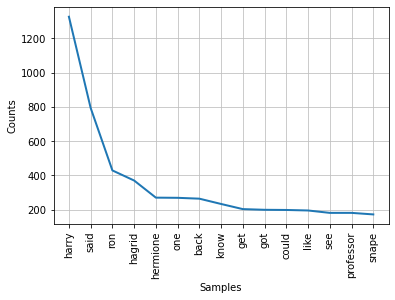

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
# Task 1.6

lem_word_freq_list.plot(15)

## Task 2 - Word Clouds

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

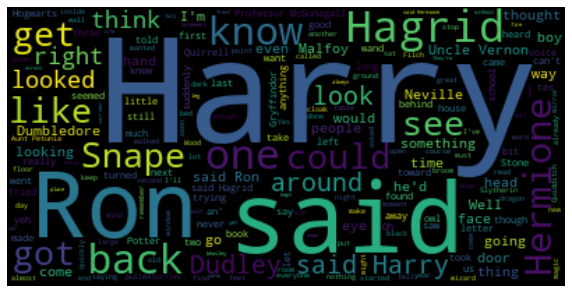

In [60]:
# TASK 2.1
wc = WordCloud(stopwords=stop_words).generate(myfile)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("OFF")
plt.show()

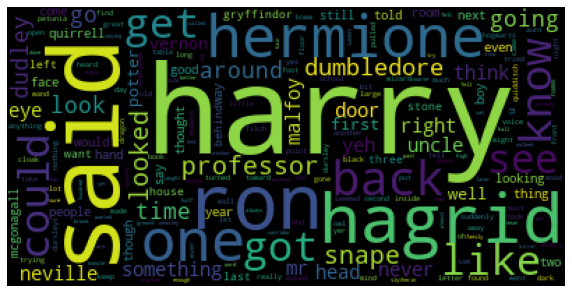

In [61]:
# Task 2.2
wc2 = WordCloud().generate_from_frequencies(lem_word_freq_list)
plt.figure(figsize=(10,10))
plt.imshow(wc2)
plt.axis('OFF')
plt.show()

### Task 2.3 - Difference between Task 2.1 and Task 2.2
<p> In 2.1, we generated the word cloud from text as such without including the stopwords </p>
<p> In 2.2, we generated the word cloud from the frequency distribution of the lemmatized words </p>

Another difference to be noted is that, both unigrams and bigrams as present in 2.1 whereas 2.2 has only unigrams as previously tokenized the text

<h1> Task 3 </h1>

<b> Difference between Text Data Processing and Numeric Data Processing </b>

<p> Numerical data is one that is usually expressed in numbers (integers, decimals, ratios etc ), often called as qualitative data. Textual data is one that is expressed as text ( words, sentences, phrases etc ). </p>

   Processing these two types of data is pretty easy. Numerical data often requires minimal preprocessing (changing the data format, normalization, rounding-off etc) before using statiscal methods to understand their distribution, mean, median, frequency etc. 
    
   On the other hand, text data required different kinds of processing methods like tokenization, stemming, lemmatization, removal of stop words, punctuation etc before they can be further analyzed. Utlimately, we want to see numerical statistics for text to understand the text distribution and carry on further analysis. 
    
   Hence, for any analysis, we want to be able to preprocess our data into numbers to be able to visualize them better. 
    
   